In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.model_selection import train_test_split

# Problem 1

### 1A

In [2]:
ctable = pd.read_csv("communities.csv", na_values = ['?'])

In [3]:
ctable.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
ctable.shape

(1994, 100)

In [5]:
ctable = ctable.dropna(axis=0)
ctable.shape

(1993, 100)

In [6]:
ctable.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,...,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.237983
std,16.401661,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,...,0.100424,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.233043
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.000000,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
pd.set_option("display.max_rows", 1000)
na = pd.DataFrame(ctable.isnull().sum(0))
na

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
racePctWhite,0
racePctAsian,0
racePctHisp,0
agePct12t21,0
agePct12t29,0


In [8]:
c_target = ctable.ViolentCrimesPerPop

In [9]:
c_target.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [10]:
c_columns = ctable.drop(['state', 'communityname', 'ViolentCrimesPerPop'], axis = 1)
c_columns.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [11]:
c_train, c_test, c_target_train, c_target_test = train_test_split(c_columns, c_target, test_size=0.2, random_state=33)


### 1B

In [12]:
def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

In [13]:
x = np.array(c_train)
x = np.array([np.concatenate((v, [1])) for v in x])

In [14]:
y = np.array(c_target_train)

In [15]:
results = standRegres(x, y)

In [16]:
print(results)

[[-1.23274125e-01]
 [ 6.75179555e-03]
 [ 2.30380105e-01]
 [ 1.19090859e-02]
 [ 2.23184672e-03]
 [ 1.03141096e-01]
 [ 1.74785968e-01]
 [-2.95684337e-01]
 [-1.50353957e-01]
 [ 1.06324388e-01]
 [ 6.27284543e-02]
 [ 4.18333159e-02]
 [-1.27178914e-01]
 [-3.02481695e-01]
 [ 3.17482567e-02]
 [-1.82704491e-01]
 [-6.22150671e-02]
 [ 2.04305861e-02]
 [-7.86345616e-02]
 [ 1.47145551e-01]
 [ 9.37761711e-03]
 [-1.40064473e-01]
 [-2.19732896e-02]
 [-3.10570337e-02]
 [ 1.70178754e-02]
 [ 2.84278945e-02]
 [ 3.76389589e-02]
 [ 1.52989956e-01]
 [-1.95656878e-01]
 [-1.10977370e-01]
 [ 6.88207406e-02]
 [ 9.40507991e-02]
 [ 3.55343798e-02]
 [ 2.87584105e-01]
 [-1.93113730e-02]
 [-1.39061270e-02]
 [ 3.62876056e-01]
 [ 2.59733194e-01]
 [-3.53559980e-02]
 [-2.76849870e-01]
 [-6.68238876e-02]
 [ 8.06394517e-02]
 [-3.33432611e-01]
 [-2.78871594e-02]
 [-9.79507415e-03]
 [ 6.57579495e-02]
 [-1.91489610e-01]
 [-2.34402322e-01]
 [ 1.45490323e-01]
 [-9.28827172e-02]
 [ 4.29715572e-02]
 [ 4.78269678e-02]
 [-1.0401659

In [17]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(alpha=0.8)

# Train the model using the training set
ridge.fit(x,y)

# Compute RMSE on training data
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.1286141854139271


In [18]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [19]:
w_ridge = ridgeRegres(x,y,0.5)
print(w_ridge)

[[-0.03779157]
 [ 0.03463906]
 [ 0.22420564]
 [ 0.00563413]
 [ 0.01050626]
 [ 0.10571015]
 [ 0.10806068]
 [-0.21241684]
 [-0.07851976]
 [ 0.11552365]
 [-0.02737188]
 [ 0.04472989]
 [ 0.02727065]
 [-0.18049169]
 [ 0.02595061]
 [-0.14090267]
 [-0.00211053]
 [ 0.03573055]
 [-0.06681353]
 [ 0.01506376]
 [ 0.00309419]
 [-0.10845793]
 [-0.02051971]
 [-0.02702449]
 [ 0.0189246 ]
 [ 0.02654848]
 [ 0.03580573]
 [ 0.04390402]
 [-0.14262427]
 [-0.10092072]
 [ 0.06589595]
 [ 0.08082395]
 [ 0.0225126 ]
 [ 0.22198017]
 [-0.01662894]
 [-0.01555212]
 [ 0.22274908]
 [ 0.18302505]
 [-0.12097211]
 [-0.02547735]
 [ 0.04182433]
 [-0.01959403]
 [-0.17176201]
 [-0.03859633]
 [-0.01348435]
 [ 0.04398604]
 [-0.16546387]
 [-0.1287197 ]
 [ 0.17151439]
 [-0.05679281]
 [ 0.04406405]
 [ 0.00396543]
 [-0.02910261]
 [ 0.00927511]
 [-0.05120625]
 [-0.04740771]
 [ 0.12545265]
 [-0.01245236]
 [ 0.03533459]
 [-0.11254151]
 [-0.09763531]
 [-0.05639908]
 [ 0.26119128]
 [-0.05912437]
 [-0.06227843]
 [-0.17000844]
 [ 0.14986

In [20]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w_ridge

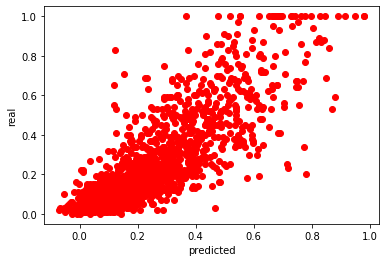

In [21]:
import matplotlib.pyplot as pl
%matplotlib inline
pl.plot(yHat, y, 'ro')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [26]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        model.fit(X[train],y[train])
        p = model.predict(x[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [27]:
rmse_10cv = cross_validate(ridge, x, y, 10, verbose=True)

Fold  1 RMSE: 0.1397
Fold  2 RMSE: 0.1305
Fold  3 RMSE: 0.1308
Fold  4 RMSE: 0.1407
Fold  5 RMSE: 0.1322
Fold  6 RMSE: 0.1343
Fold  7 RMSE: 0.1250
Fold  8 RMSE: 0.1259
Fold  9 RMSE: 0.1342
Fold 10 RMSE: 0.1577



### 1C

In [28]:
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score

In [29]:
x_c = np.array([np.concatenate((v,[1])) for v in np.array(c_columns)])
y_c = np.array(c_target).T
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=0.2, random_state=1)
np.shape(x_train)

(1594, 98)

In [30]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
x_train_fs = fs.fit_transform(c_train, c_target_train)

In [31]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(list(c_columns.columns))
print(fs.get_support())
print(fs.scores_)

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'Pers

In [32]:
print(c_columns.columns[fs.get_support()].values)

['racepctblack' 'racePctWhite' 'medIncome' 'pctWInvInc' 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov'
 'PctLess9thGrade' 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce' 'FemalePctDiv' 'TotalPctDiv' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg' 'PctIlleg' 'PctLargHouseFam' 'PctPersOwnOccup'
 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant' 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone' 'NumInShelters']


In [33]:
for i in range(len(c_columns.columns.values)):
    if fs.get_support()[i]:
        print("%10s  %3.2f" % (c_columns.columns.values[i], fs.scores_[i]))

racepctblack  992.16
racePctWhite  1304.88
 medIncome  341.31
pctWInvInc  761.06
pctWPubAsst  783.22
 medFamInc  374.43
NumUnderPov  361.96
PctPopUnderPov  569.49
PctLess9thGrade  296.03
PctNotHSGrad  461.06
PctUnemployed  532.36
MalePctDivorce  580.34
FemalePctDiv  693.86
TotalPctDiv  677.23
PctFam2Par  1596.84
PctKids2Par  1901.30
PctYoungKids2Par  1269.98
PctTeen2Par  1231.32
  NumIlleg  399.83
  PctIlleg  1856.85
PctLargHouseFam  240.01
PctPersOwnOccup  600.10
PctPersDenseHous  348.81
PctHousLess3BR  446.48
HousVacant  314.72
PctHousOwnOcc  448.76
PctVacantBoarded  489.30
PctHousNoPhone  485.84
NumInShelters  246.13


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    X_train_fs = fs.fit_transform(x_train, y_train)
    scores = cross_val_score(linreg, X_train_fs, y_train, cv=5, scoring = 'neg_mean_absolute_error')
    print("%2d  %0.4f" % (i, scores.mean()))
    results = np.append(results, scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divid

 1  -0.1099
 6  -0.1002
11  -0.1001
16  -0.1003
21  -0.0982
26  -0.0966
31  -0.0967
36  -0.0957
41  -0.0962


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divid

46  -0.0963
51  -0.0970
56  -0.0972
61  -0.0977
66  -0.0980
71  -0.0982


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divid

76  -0.0985
81  -0.0984
86  -0.0980
91  -0.0979
96  -0.0976


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divid

In [36]:
optimal_percentile_ind = np.where(results == results.max())[0][0]
print(optimal_percentile_ind)

7


In [37]:
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(c_columns.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

Optimal percentile of features:36 

Optimal number of features:34 



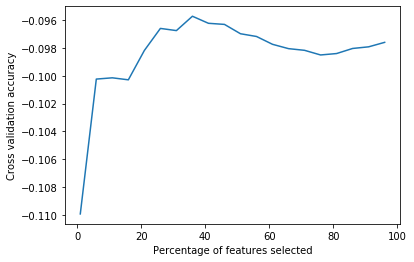

In [38]:
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [39]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [40]:
linreg.fit(x_train_fs, y_train)
X_test_fs = fs.transform(x_test)
measure_performance(X_test_fs, y_test, linreg, show_confussion_matrix=False, show_classification_report=True)

ValueError: shapes (399,94) and (29,) not aligned: 94 (dim 1) != 29 (dim 0)


### 1D

In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def calc_params(X, y, param_values, param_name, K, clf):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            train_predict = clf.predict(X[train])
            test_predict = clf.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    min_err = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err]
    print('The minimum Mean absolute error is:', test_scores[min_err][0],'alpha is', min_err_alpha[0])

In [42]:
alpha = np.linspace(0.01, 200, 200)
alpha = np.array([float(e) for e in alpha])
ridge = Ridge()
lasso = Lasso()

alpha  =  0.01
alpha  =  1.0149748743718594
alpha  =  2.0199497487437186
alpha  =  3.024924623115578
alpha  =  4.029899497487437
alpha  =  5.0348743718592965
alpha  =  6.039849246231157
alpha  =  7.044824120603016
alpha  =  8.049798994974875
alpha  =  9.054773869346734
alpha  =  10.059748743718593
alpha  =  11.064723618090452
alpha  =  12.069698492462313
alpha  =  13.074673366834173
alpha  =  14.079648241206032
alpha  =  15.084623115577891
alpha  =  16.089597989949752
alpha  =  17.094572864321613
alpha  =  18.09954773869347
alpha  =  19.10452261306533
alpha  =  20.10949748743719
alpha  =  21.11447236180905
alpha  =  22.119447236180907
alpha  =  23.124422110552768
alpha  =  24.12939698492463
alpha  =  25.134371859296486
alpha  =  26.139346733668347
alpha  =  27.144321608040205
alpha  =  28.149296482412066
alpha  =  29.154271356783923
alpha  =  30.159246231155784
alpha  =  31.16422110552764
alpha  =  32.1691959798995
alpha  =  33.17417085427136
alpha  =  34.17914572864322
alpha  =  35.18

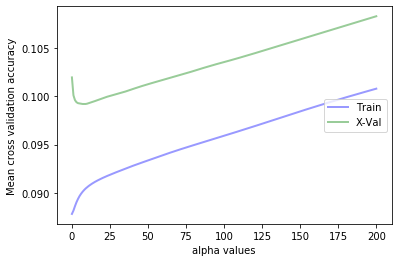

In [43]:
calc_params(x_train, y_train, alpha, "alpha", 5, ridge)

In [44]:
from sklearn.metrics import mean_squared_error

ridge = Ridge(fit_intercept = True, alpha = 8.049798994974875)
ridge.fit(x_train, y_train)    
pred = ridge.predict(x_test)
mae = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % mae)

Mean absolute error on test data: 0.02066520


alpha  =  0.01
alpha  =  1.0149748743718594
alpha  =  2.0199497487437186
alpha  =  3.024924623115578
alpha  =  4.029899497487437
alpha  =  5.0348743718592965
alpha  =  6.039849246231157
alpha  =  7.044824120603016
alpha  =  8.049798994974875
alpha  =  9.054773869346734
alpha  =  10.059748743718593
alpha  =  11.064723618090452
alpha  =  12.069698492462313
alpha  =  13.074673366834173
alpha  =  14.079648241206032
alpha  =  15.084623115577891
alpha  =  16.089597989949752
alpha  =  17.094572864321613
alpha  =  18.09954773869347
alpha  =  19.10452261306533
alpha  =  20.10949748743719
alpha  =  21.11447236180905
alpha  =  22.119447236180907
alpha  =  23.124422110552768
alpha  =  24.12939698492463
alpha  =  25.134371859296486
alpha  =  26.139346733668347
alpha  =  27.144321608040205
alpha  =  28.149296482412066
alpha  =  29.154271356783923
alpha  =  30.159246231155784
alpha  =  31.16422110552764
alpha  =  32.1691959798995
alpha  =  33.17417085427136
alpha  =  34.17914572864322
alpha  =  35.18

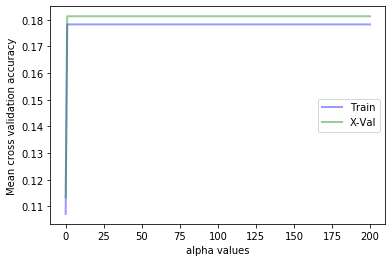

In [45]:
calc_params(x_train, y_train, alpha, "alpha", 5, lasso)

In [46]:
lasso = Lasso(fit_intercept = True, alpha = 0.01)
lasso.fit(x_train, y_train)    
pred = lasso.predict(x_test)
mae = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % mae)

Mean absolute error on test data: 0.02529235


Overall it looks like ridge regression had the lower MAE at 0.02066520 compared to lasso regression which had an MAE of 0.02529235.


### 1E

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [48]:
s = StandardScaler()
s.fit(c_columns)
x_norm = s.transform(c_columns)
x_train, x_test, y_train, y_test = train_test_split(x_norm, c_target, test_size=0.2, random_state=33)

In [49]:
sgdr = SGDRegressor()
para = {'penalty': ['l2', 'l1'], 'alpha': np.linspace(0.0001, 10, 100)}
gs = GridSearchCV(sgdr, para, verbose = 1, cv = 5)

In [50]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 16.6 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.5s finished


({'alpha': 0.10110909090909091, 'penalty': 'l2'}, 0.6386396201348938)

In [51]:
gs.best_params_, gs.best_score_

({'alpha': 0.10110909090909091, 'penalty': 'l2'}, 0.6386396201348938)


# Problem 2


### 2A

In [52]:
def cosineSim(x, d):
    norm_x = np.linalg.norm(x)
    norm_d = np.linalg.norm(d)
    sim = np.dot(d, x)/(norm_d * norm_x)
    dist = 1 - sim
    return dist


### 2B

In [53]:
matrix = pd.DataFrame(np.genfromtxt("matrix.txt", delimiter=',', dtype=int).T)
classes = pd.DataFrame(np.genfromtxt("classes.txt", delimiter=' ', dtype=int, skip_header=1))
terms = np.array(pd.DataFrame(np.genfromtxt("terms.txt", delimiter='\t', dtype=str)))

In [54]:
matrix_train, matrix_test, classes_train, classes_test = train_test_split(matrix, classes, test_size=0.2, random_state=33)


### 2C

In [55]:
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k)
	return centroids 

def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [56]:
def print_top_terms(data, K, numterms):
    cent, c_assment = kMeans(mat(data), K, distMeas = cosineSim)
    for i in range(K):
        print('Cluster', i+1)
        c_matrix = data[c_assment[:, 0] == i]
        print('Number of items in Cluster ',i+1 ,': ', c_matrix.shape[0])
        c_freq = np.array([(c_matrix.T != 0).sum(1)]).T    
        mc = c_freq / float(c_matrix.shape[0])
        mc = map(list, mc)
        mc = [m[0] for m in mc]
        c_freq = [m[0] for m in c_freq]
        n = sorted(zip(terms, c_freq, mc),key = lambda x:x[2], reverse = True)
        for m in n[:numterms]:
            print('Term: ',m[0])
            print('DF: ', m[2] * 100,'\n')
        print('\n')
    return cent, c_assment


In [57]:
cent, c_assment = print_top_terms(matrix_train, 5, 10)

Cluster 1
Number of items in Cluster  1 :  0
Term:  ['aa']
DF:  nan 

Term:  ['aargh']
DF:  nan 

Term:  ['aaron']
DF:  nan 

Term:  ['aaronc']
DF:  nan 

Term:  ['ab']
DF:  nan 

Term:  ['abandon']
DF:  nan 

Term:  ['abc']
DF:  nan 

Term:  ['abid']
DF:  nan 

Term:  ['abil']
DF:  nan 

Term:  ['abl']
DF:  nan 



Cluster 2
Number of items in Cluster  2 :  340


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Term:  ['subject']
DF:  100.0 

Term:  ['write']
DF:  68.52941176470588 

Term:  ['kei']
DF:  54.11764705882353 

Term:  ['clipper']
DF:  53.8235294117647 

Term:  ['encrypt']
DF:  52.64705882352941 

Term:  ['articl']
DF:  51.76470588235295 

Term:  ['chip']
DF:  45.88235294117647 

Term:  ['on']
DF:  45.88235294117647 

Term:  ['govern']
DF:  37.35294117647059 

Term:  ['system']
DF:  35.88235294117647 



Cluster 3
Number of items in Cluster  3 :  827
Term:  ['subject']
DF:  100.0 

Term:  ['window']
DF:  35.67110036275695 

Term:  ['thank']
DF:  28.536880290205563 

Term:  ['email']
DF:  27.9322853688029 

Term:  ['sale']
DF:  27.690447400241837 

Term:  ['pleas']
DF:  26.964933494558647 

Term:  ['on']
DF:  26.118500604594924 

Term:  ['write']
DF:  26.118500604594924 

Term:  ['get']
DF:  24.30471584038694 

Term:  ['work']
DF:  22.49093107617896 



Cluster 4
Number of items in Cluster  4 :  827
Term:  ['subject']
DF:  100.0 

Term:  ['write']
DF:  61.78960096735187 

Term:  ['o


### 2D

In [58]:
from sklearn.metrics import completeness_score, homogeneity_score

In [59]:
print(completeness_score(np.array(classes_train.T)[0],c_assment[:,0]))

1.0000000000000009


In [60]:
print(homogeneity_score(np.array(classes_train.T)[0],c_assment[:,0]))

0.1380075522531133
